# nacc dataset

### 1. Data cleaning

In [1]:
import tarfile
import pandas as pd
import numpy as np

In [10]:
# see if this is a tar file
# print(tarfile.is_tarfile("fs_t1_nacc.tar"))

tar = tarfile.open("fs_t1_nacc.tar")
# get a list of tarInfo objects
directory = tar.getmembers()
# extract names from the objects to get a directory list
directory = [file.name.split("/")[1] for file in directory if file.isfile()]
# 7862 files in total
image_info = pd.DataFrame(directory,columns=["filename"])
image_info["NACCMRFI"] = image_info["filename"].apply(lambda x: x.split("_")[0])
image_info.head()
# 5897 unique NACCMRFIs in total

,filename,NACCMRFI
0,mri71_MPRAGE_T1_AX_20100921133637_15.nii.gz,mri71
1,mri3579_t1_fl2d_sag_20100610142105_3.nii.gz,mri3579
2,mri4375_MPRAGE_20110105152454_2.nii.gz,mri4375
3,mri4908_SAG_T1_20130424203248_2.nii.gz,mri4908
4,mri1061_FSPGR_rhuser1=-376_rhuser2=10_20130620...,mri1061


In [11]:
# load data_nacc_diagnosis.csv to match the diagnosis with image data
clinic_info = pd.read_csv("data_nacc_diagnosis.csv")
clinic_info.head()

# remove columns we don't use
temp1 = clinic_info.iloc[:,1:3]
temp1.head()

# check the duplicate situation, generate a list of indices to drop
temp2 = temp1.groupby("NACCMRFI").nunique()
# drop the conflicting-diagnoses cases: 12 cases removed
duplicates = temp2[temp2["diagnosis_0normal_1normaltomci_2mci_3ad_4otherdementia"]==2].index
temp3 = temp1.set_index("NACCMRFI").drop(labels=list(duplicates),axis=0)
# drop normal duplicates, 81 cases removed
diag_info = temp3.reset_index().drop_duplicates()
# modify ID information
diag_info["NACCMRFI"] = diag_info["NACCMRFI"].apply(lambda x: x.split(".")[0])
diag_info.head()

C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (98,202,204,206,237,250,259,380,405,441,457,509,513,515,582,637,638,639,647,648,649,650,660,682,685) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NACCMRFI,diagnosis_0normal_1normaltomci_2mci_3ad_4otherdementia
0,mri1140,0
1,mri5864,0
2,mri5863,0
3,mri4786,0
4,mri7855,0


In [23]:
# merge the two files and see the matching results
match_info = image_info.merge(diag_info, left_on="NACCMRFI", right_on="NACCMRFI", how="outer")
act_dataset_len = len(match_info[(match_info["diagnosis_0normal_1normaltomci_2mci_3ad_4otherdementia"].isna()==False)&(match_info["filename"].isna()==False)])
whole_dataset_len = len(match_info)
print("There are %s data points in total."%whole_dataset_len)
print("Only %s can be matched to the diagnosis information which can be used as the dataset."%act_dataset_len)

# take all useful data points
data_info = match_info[(match_info["diagnosis_0normal_1normaltomci_2mci_3ad_4otherdementia"].isna()==False)&(match_info["filename"].isna()==False)]
data_info.head(30)

There are 8836 data points in total.
Only 6272 can be matched to the diagnosis information which can be used as the dataset.


,filename,NACCMRFI,diagnosis_0normal_1normaltomci_2mci_3ad_4otherdementia
0,mri71_MPRAGE_T1_AX_20100921133637_15.nii.gz,mri71,3.0
1,mri3579_t1_fl2d_sag_20100610142105_3.nii.gz,mri3579,3.0
2,mri3579_MPRAGE_adni1mm_ipat_20100610142105_11....,mri3579,3.0
3,mri3579_ep2d_t1w_128_2mm_20100610142105_19.nii.gz,mri3579,3.0
4,mri3579_MPRAGE_adni1mm_ipat_20100610142105_13....,mri3579,3.0
5,mri4375_MPRAGE_20110105152454_2.nii.gz,mri4375,2.0
6,mri4908_SAG_T1_20130424203248_2.nii.gz,mri4908,4.0
7,mri4908_AX_T1_20130424203248_8.nii.gz,mri4908,4.0
8,mri1061_FSPGR_rhuser1=-376_rhuser2=10_20130620...,mri1061,3.0
14,mri376_Ax_FSPGR_BRAVO_20130109081555_10.nii.gz,mri376,0.0


In [54]:
sample = data_info.iloc[:100,:]
for file in sample["filename"]:
    path = "fs_t1/" + file
    tar.extract(path)

In [52]:
sample

,filename,NACCMRFI,diagnosis_0normal_1normaltomci_2mci_3ad_4otherdementia
0,mri71_MPRAGE_T1_AX_20100921133637_15.nii.gz,mri71,3.0
1,mri3579_t1_fl2d_sag_20100610142105_3.nii.gz,mri3579,3.0
2,mri3579_MPRAGE_adni1mm_ipat_20100610142105_11....,mri3579,3.0
3,mri3579_ep2d_t1w_128_2mm_20100610142105_19.nii.gz,mri3579,3.0
4,mri3579_MPRAGE_adni1mm_ipat_20100610142105_13....,mri3579,3.0
5,mri4375_MPRAGE_20110105152454_2.nii.gz,mri4375,2.0
6,mri4908_SAG_T1_20130424203248_2.nii.gz,mri4908,4.0
7,mri4908_AX_T1_20130424203248_8.nii.gz,mri4908,4.0
8,mri1061_FSPGR_rhuser1=-376_rhuser2=10_20130620...,mri1061,3.0
14,mri376_Ax_FSPGR_BRAVO_20130109081555_10.nii.gz,mri376,0.0


### 2. Apply the autoencoder

In [24]:
from nilearn import plotting
import nibabel as nib
import os


C:\Users\zhang\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


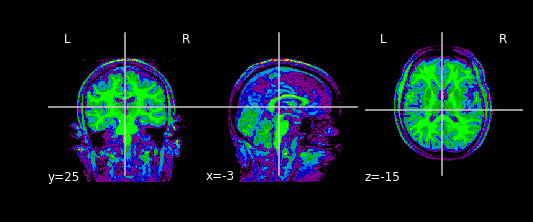

In [45]:
p
plotting.plot_epi("fs_t1/mri1001_Coronal-MPRAGE_20090113091713_3.nii.gz")
plotting.show()

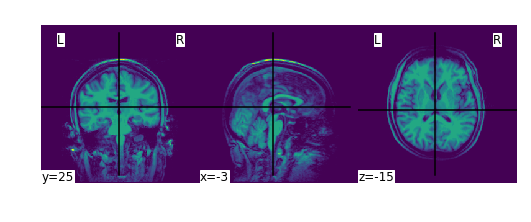

In [53]:
tar.extract("fs_t1/mri1001_Coronal-MPRAGE_20090113091713_3d.nii.gz")
plotting.plot_img("fs_t1/mri1001_Coronal-MPRAGE_20090113091713_3d.nii.gz")
plotting.show()

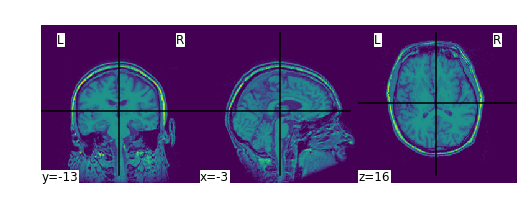

In [54]:
tar.extract("fs_t1/mri1001_FSPGR_rhuser1=-376_rhuser2=10_20090113113423_3.nii.gz")
plotting.plot_img("fs_t1/mri1001_FSPGR_rhuser1=-376_rhuser2=10_20090113113423_3.nii.gz")
plotting.show()

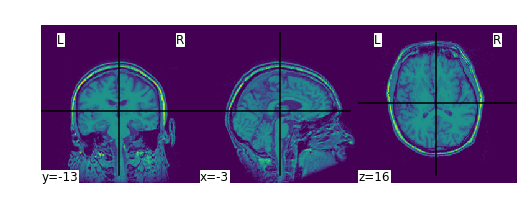

In [55]:
tar.extract("fs_t1/mri1001_FSPGR_rhuser1=-376_rhuser2=10_20090113113423_3d.nii.gz")
plotting.plot_img("fs_t1/mri1001_FSPGR_rhuser1=-376_rhuser2=10_20090113113423_3d.nii.gz")
plotting.show()

In [25]:
img4 = nib.load("fs_t1/mri1001_FSPGR_rhuser1=-376_rhuser2=10_20090113113423_3d.nii.gz")
img_data4 = img4.get_data()

In [27]:
img_data4.shape

(256, 256, 256)

In [29]:
img4.get_data_dtype()

dtype('uint8')

In [46]:
img_data4

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [30]:
help(img4)

Help on Nifti1Image in module nibabel.nifti1 object:

class Nifti1Image(Nifti1Pair)
 |  Class for single file NIfTI1 format image
 |  
 |  Method resolution order:
 |      Nifti1Image
 |      Nifti1Pair
 |      nibabel.analyze.AnalyzeImage
 |      nibabel.spatialimages.SpatialImage
 |      nibabel.dataobj_images.DataobjImage
 |      nibabel.filebasedimages.FileBasedImage
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  update_header(self)
 |      Harmonize header with image data and affine
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  files_types = (('image', '.nii'),)
 |  
 |  header_class = <class 'nibabel.nifti1.Nifti1Header'>
 |      Class for NIfTI1 header
 |      
 |      The NIfTI1 header has many more coded fields than the simpler Analyze
 |      variants.  NIfTI1 headers also have extensions.
 |      
 |      Nifti allows the header to be a separate file, as part of a nifti im